In [ ]:
!pip install easyocr pandas -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 59.6 MB/s eta 0:00:00


In [ ]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import spacy

In [ ]:
IMAGE_PATH = '/content/holy-plate-main.jpg'

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

[([[118, 185], [297, 185], [297, 296], [118, 296]],
  'GOD',
  0.29818339679564554),
 ([[340, 179], [513, 179], [513, 290], [340, 290]], '999', 0.8137600985685647),
 ([[121, 281], [461, 281], [461, 326], [121, 326]],
  '42Matatag na Republiko',
  0.36816725781802895),
 ([[471, 281], [507, 281], [507, 301], [471, 301]],
  '2023',
  0.6455720663070679)]

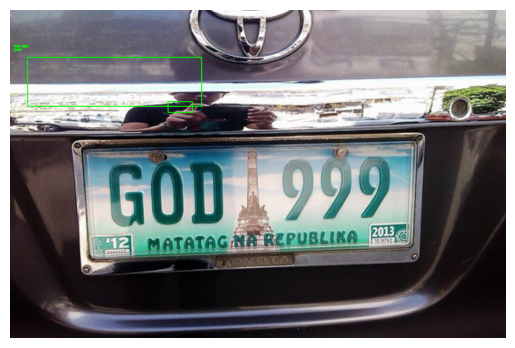

In [ ]:
# Check if the result is populated
if not result:
    raise ValueError("The result list is empty")

# Load the image
img = cv2.imread(IMAGE_PATH)

# Check if the image is loaded successfully
if img is None:
    raise ValueError(f"Could not load image from path: {IMAGE_PATH}")

# Resize the image
scale_percent = 400  # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# Resize image
img = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)

# Define font and initial spacer
font = cv2.FONT_HERSHEY_SIMPLEX
spacer = 200

# Iterate over each detection in the result
for detection in result:
    if len(detection) < 2 or len(detection[0]) < 4:
        print(f"Invalid detection format: {detection}")
        continue

    try:
        # Extract and convert coordinates to integers
        top_left = tuple(map(int, detection[0][0]))
        bottom_right = tuple(map(int, detection[0][2]))
        text = detection[1]

        # Adjust coordinates according to the resized image
        top_left = (int(top_left[0] * scale_percent / 100), int(top_left[1] * scale_percent / 100))
        bottom_right = (int(bottom_right[0] * scale_percent / 100), int(bottom_right[1] * scale_percent / 100))

        # Draw rectangle and text
        img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
        img = cv2.putText(img, text, (20, spacer), font, 0.5, (0, 255, 0), 2, cv2.LINE_AA)

        spacer += 15
    except Exception as e:
        print(f"Error processing detection {detection}: {e}")

# Convert BGR image to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()